In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tqdm import tqdm  # Import tqdm for progress bars
from skimage.io import imread  # Import imread for reading images
import matplotlib.pyplot as plt
from skimage.transform import resize

IMG_WEIGHT=128
IMG_HEIGHT=128
IMG_CHANNELS=3


In [2]:
import os
import zipfile

# Define the path to the zip file and the extraction directory
zip_path = '/kaggle/input/data-science-bowl-2018/stage1_train.zip'
extract_dir = '/kaggle/working/stage1_train/'

# Create the extraction directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
print(f"Extracted {len(extracted_files)} files:")
print(extracted_files[:10])  # Print first 10 files as a sample


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/data-science-bowl-2018/stage1_train.zip'

In [ ]:
import os
import zipfile

# Define the path to the zip file and the extraction directory
zip_path = '/kaggle/input/data-science-bowl-2018/stage1_test.zip'
extract_dir1 = '/kaggle/working/stage1_test/'

# Create the extraction directory if it does not exist
os.makedirs(extract_dir1, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir1)

# List the contents of the extracted directory
extracted1_files = os.listdir(extract_dir1)
print(f"Extracted {len(extracted1_files)} files:")
print(extracted1_files[:10])  # Print first 10 files as a sample


Extracted 65 files:
['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d', '8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab', '5cee644e5ffbef1ba021c7f389b33bafd3b1841f04d3edd7922d5084c2c4e0c7', '550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18', '4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee', '0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac', 'ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e', '432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580', 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8', '9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2']


In [ ]:
import numpy as np

In [ ]:
x_train=np.zeros((len(extracted_files),IMG_HEIGHT,IMG_WEIGHT,IMG_CHANNELS),dtype=np.int8)
y_train=np.zeros((len(extracted_files),IMG_HEIGHT,IMG_WEIGHT,1),dtype=bool)

In [ ]:
y_train.shape

(670, 128, 128, 1)

In [ ]:
x_test=np.zeros((len(extracted1_files),IMG_HEIGHT,IMG_WEIGHT,IMG_CHANNELS),dtype=np.int8)
sizes_test=[]

for n,id_ in tqdm(enumerate(extracted1_files),total=len(extracted1_files)):
    path=extract_dir1+id_
    img=imread(path+'/images/'+id_+'.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0],img.shape[1]])
    img=resize(img,(IMG_HEIGHT,IMG_WEIGHT),mode='constant',preserve_range=True)
    x_test[n]=img

100%|██████████| 65/65 [00:01<00:00, 49.27it/s]


In [ ]:
import random

In [ ]:
import matplotlib.pyplot as plt

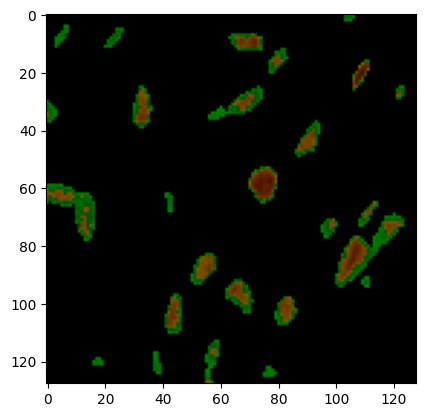

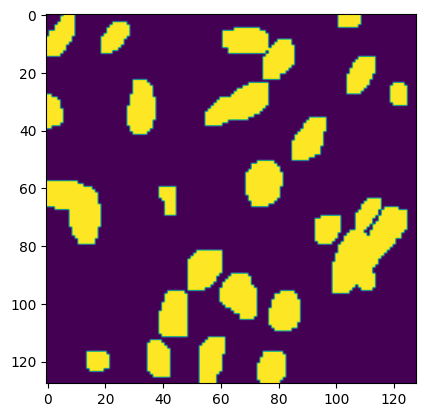

In [ ]:
image_x=random.randint(0,670)
plt.imshow(x_train[image_x])
plt.show()
plt.imshow(np.squeeze(y_train[image_x]))
plt.show()

In [ ]:
print(path + '/images/'+id_+'.png')

/kaggle/working/stage1_train/da31f2aa8601afec5c45180a2c448cb9c4a8ec7b35e75190d6ba3588f69058c8/images/da31f2aa8601afec5c45180a2c448cb9c4a8ec7b35e75190d6ba3588f69058c8.png


In [ ]:
for n,id_ in tqdm(enumerate(extracted_files),total=len(extracted_files)):
    path=extract_dir+id_
    img=imread(path + '/images/'+id_+'.png')[:,:,:IMG_CHANNELS]
    img=resize(img,(IMG_HEIGHT,IMG_WEIGHT),mode='constant',preserve_range=True)
    x_train[n]=img
    mask=np.zeros((IMG_HEIGHT,IMG_WEIGHT,1),dtype=bool)
    for mask_file in next(os.walk(path+'/masks/'))[2]:
        mask_=imread(path+'/masks/'+mask_file)
        mask_=np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WEIGHT),mode='constant',preserve_range=True),axis=-1)
        mask=np.maximum(mask,mask_)

    y_train[n]=mask


100%|██████████| 670/670 [03:55<00:00,  2.85it/s]


In [ ]:
inputs=tf.keras.layers.Input((IMG_WEIGHT,IMG_HEIGHT,IMG_CHANNELS))
s=tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(s)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

c2=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

c3=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)
c3=tf.keras.layers.Dropout(0.1)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

c4=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p3)
c4=tf.keras.layers.Dropout(0.2)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

c5=tf.keras.layers.Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p4)
c5=tf.keras.layers.Dropout(0.3)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c5)

#Expansion path

u6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=2,padding="same")(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
c6=tf.keras.layers.Dropout(0.2)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)

u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=2,padding="same")(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
c7=tf.keras.layers.Dropout(0.1)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)

u8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=2,padding="same")(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
c8=tf.keras.layers.Dropout(0.1)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)

u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=2,padding="same")(c8)
u9=tf.keras.layers.concatenate([u9,c1])
c9=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
c9=tf.keras.layers.Dropout(0.1)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)

outputs=tf.keras.layers.Conv2D(1,(1,1),activation="sigmoid")(c9)
model=tf.keras.Model(inputs=[inputs],outputs=[outputs])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,938,785 (7.40 MB)

 Trainable params: 1,938,785 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpointers = tf.keras.callbacks.ModelCheckpoint('model_nuclei.keras', verbose=1, save_best_only=True)

callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir="logs")
]

results = model.fit(x_train, y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)


Epoch 1/25
 1/38 ━━━━━━━━━━━━━━━━━━━━ 19:26 32s/step - accuracy: 0.3522 - loss: 0.6968

I0000 00:00:1717763859.254679     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/38 ━━━━━━━━━━━━━━━━━━━━ 60s 757ms/step - accuracy: 0.7477 - loss: 0.5896 - val_accuracy: 0.9114 - val_loss: 0.2173
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9033 - loss: 0.2373 - val_accuracy: 0.9485 - val_loss: 0.1377
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9367 - loss: 0.1692 - val_accuracy: 0.9510 - val_loss: 0.1278
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9429 - loss: 0.1540 - val_accuracy: 0.9590 - val_loss: 0.1117
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9483 - loss: 0.1360 - val_accuracy: 0.9605 - val_loss: 0.1076
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9527 - loss: 0.1282 - val_accuracy: 0.9571 - val_loss: 0.1167
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9526 - loss: 0.1212 - val_accuracy: 0.9588 - val_loss: 0.1030
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9578 - loss: 0.1082 - val_accuracy: 0.9622 - val_loss: 

In [ ]:
idx=random.randint(0,len(x_train))

In [ ]:
preds_train=model.predict(x_train[:int(x_train.shape[0]*0.9)],verbose=1)
preds_val=model.predict(x_train[int(x_train.shape[0]*0.9):],verbose=1)
preds_tests=model.predict(x_test,verbose=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step 


In [ ]:
preds_train_t=(preds_train>0.5).astype(np.uint8)
preds_val_t=(preds_val>0.5).astype(np.uint8)
preds_test_t=(preds_tests>0.5).astype(np.uint8)


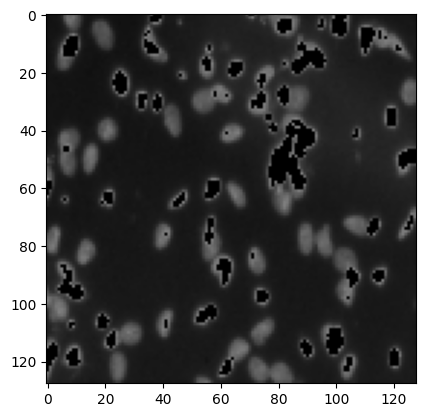

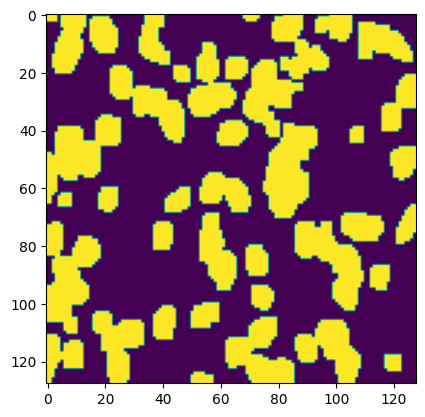

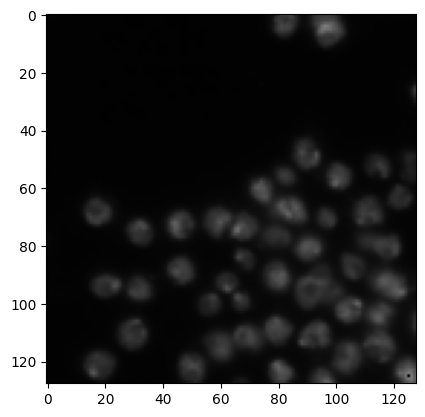

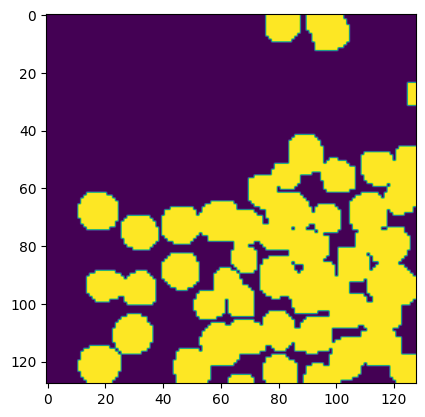

In [ ]:
ix=random.randint(0,len(preds_train_t))
plt.imshow(x_train[ix])
plt.show()

plt.imshow(np.squeeze(y_train[ix]))
plt.show()

ix=random.randint(0,len(preds_val_t))
plt.imshow(x_train[ix])
plt.show()
plt.imshow(np.squeeze(y_train[ix]))
plt.show()

ix=random.randint(0,len(preds_test_t))

In [ ]:
!tensorboard --logdir=/kaggle/working/logs --host localhost --port 8088

In [ ]:
!pip install kaggle_tensorboard


UnboundLocalError: local variable 'child' referenced before assignment

In [ ]:
from kaggle_tensorboard import KaggleTensorBoard


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1275), started 0:00:06 ago. (Use '!kill 1275' to kill it.)